# 3D pose visualization

We are using Openpose and a stereo camera system in order to retrieve human poses. The main purpose of this notebook is the visualization of these 3D poses. This would help us to find out which features we should take from the human body in order to train a machine learning algorithm.

Below this paragraph you can find how looks the output of Openpose. The pose data is composed of **25 keypoints** defining the 3D pose of one person.

![imagen](https://raw.githubusercontent.com/CMU-Perceptual-Computing-Lab/openpose/master/doc/media/keypoints_pose_25.png)


Each joint has a number and is encoded inside an array. The array has the next format:

\\[[x_0, y_0, z_0, c_0, \dots , x_{24}, y_{24}, z_{24}, c_{24}]\\] 

With \\((x,y,z)\\) being the coordinates and \\(c\\) the confidence of the joint.

Each number corresponds to a different part of the human body as listed below:

```C++
// Result for BODY_25 (25 body parts consisting of COCO + foot)
const std::map<unsigned int, std::string> POSE_BODY_25_BODY_PARTS {
     {0,  "Nose"},
     {1,  "Neck"},
     {2,  "RShoulder"},
     {3,  "RElbow"},
     {4,  "RWrist"},
     {5,  "LShoulder"},
     {6,  "LElbow"},
     {7,  "LWrist"},
     {8,  "MidHip"},
     {9,  "RHip"},
     {10, "RKnee"},
     {11, "RAnkle"},
     {12, "LHip"},
     {13, "LKnee"},
     {14, "LAnkle"},
     {15, "REye"},
     {16, "LEye"},
     {17, "REar"},
     {18, "LEar"},
     {19, "LBigToe"},
     {20, "LSmallToe"},
     {21, "LHeel"},
     {22, "RBigToe"},
     {23, "RSmallToe"},
     {24, "RHeel"},
     {25, "Background"}
};
```

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from glob import glob
import json

%matplotlib notebook 
#%matplotlib qt 

In [2]:
class Point3D():
    def __init__(self, x, y, z, confidence):
        self.x = x
        self.y = y
        self.z = z
        self.confidence = confidence
        
        self.point = [x, y, z]
        
BODY_PARTS_NAMES = ['Nose', 'Neck', 'RShoulder', 'RElbow', 'RWrist', 'LShoulder', 'LElbow',
                    'LWrist', 'MidHip', 'RHip', 'RKnee', 'RAnkle', 'LHip', 'LKnee', 'LAnkle',
                    'REye', 'LEye', 'REar', 'LEar', 'LBigToe', 'LSmallToe', 'LHeel', 'RBigToe',
                    'RSmallToe', 'RHeel']

BONE_PAIRS = [[0, 1], [0, 15], [0, 16], [1, 2], [1, 5], [1, 8], [2, 3], [3, 4], [5, 6], [6, 7], 
              [8, 9], [8, 12], [9, 10], [10, 11], [11, 22], [11, 24], [12, 13], [13, 14], [14, 19], 
              [14, 21], [15, 17], [16, 18], [19, 20], [22, 23]]
BONE_COLORS = {(0, 1): '#990033',
               (0, 15): '#990066',
               (0, 16): '#650098',
               (1, 2): '#993300',
               (1, 5): '#649600',
               (1, 8): '#990000',
               (2, 3): '#996600',
               (3, 4): '#989800',
               (5, 6): '#319700',
               (6, 7): '#009900',
               (8, 9): '#009933',
               (8, 12): '#006699',
               (9, 10): '#009966',
               (10, 11): '#009999',
               (11, 22): '#009999',
               (11, 24): '#009898',
               (12, 13): '#003399',
               (13, 14): '#000099',
               (14, 19): '#000099',
               (14, 21): '#000094',
               (15, 17): '#990099',
               (16, 18): '#320098',
               (19, 20): '#000099',
               (22, 23): '#009999'}

In [5]:
def read_keypoints(filename):
    with open(filename, 'r') as f:
        pose_dict = json.load(f)

    pose_keypoints_3d = pose_dict['people'][0]['pose_keypoints_3d']
    keypoints = list()
    keypoints_array = list()
    for i in range(0, len(pose_keypoints_3d), 4):
        x = pose_keypoints_3d[i]
        y = pose_keypoints_3d[i + 1]
        z = pose_keypoints_3d[i + 2]
        keypoints += [Point3D(x, y, z,
                              pose_keypoints_3d[i + 3])]

        keypoints_array += [[x, y, z]]

    return keypoints, np.array(keypoints_array)


keypoints, keypoints_array = read_keypoints('./Data/67_keypoints.json')
print('{} keypoints loaded'.format(len(keypoints)))
print('Nose is in position ({}, {}, {}) with confidence {}'.format(keypoints[0].x,
                                                                   keypoints[0].y,
                                                                   keypoints[0].z,
                                                                   keypoints[0].confidence))

25 keypoints loaded
Nose is in position (296.976, -586.867, 1608.61) with confidence 1


In [70]:
def plot_3dkeypoints(ax, keypoints_array):
    ax.scatter(keypoints_array[:, 0],
               keypoints_array[:, 1],
               keypoints_array[:, 2])

    for bone_pair in BONE_PAIRS:
        point_pair = keypoints_array[bone_pair]
        if not np.max(point_pair == 0):
            ax.plot(point_pair[:, 0],
                    point_pair[:, 1],
                    point_pair[:, 2], color=BONE_COLORS[tuple(bone_pair)])


    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')

In [71]:
imgfilenames = glob('Data/*.png')
kpfilenames = glob('Data/*.json')

print('{} poses available in Data/'.format(len(imgfilenames)))

315 poses available in Data/


<IPython.core.display.Javascript object>


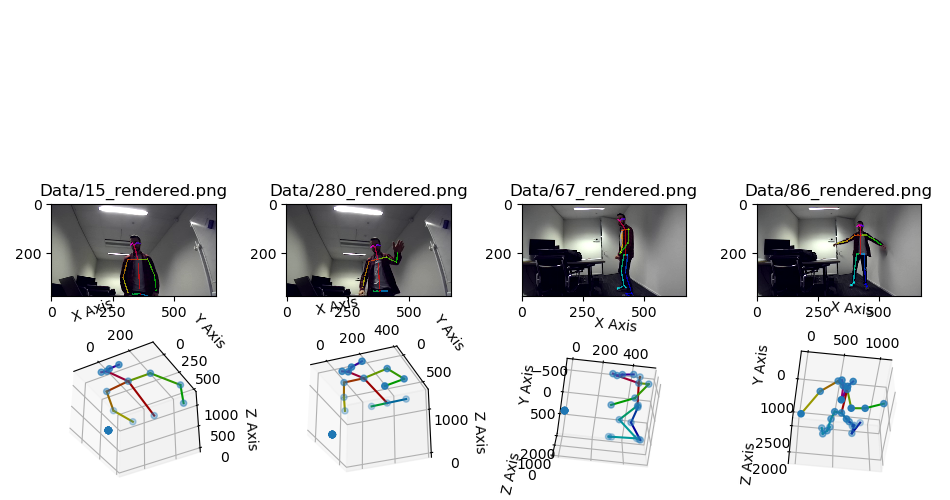

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()


In [72]:
from scipy.misc import imread

filenames = ['Data/15_rendered.png', 'Data/280_rendered.png', 'Data/67_rendered.png', 'Data/86_rendered.png', 
             'Data/15_keypoints.json', 'Data/280_keypoints.json', 'Data/67_keypoints.json', 'Data/86_keypoints.json'] 

def plot_skeleton(filenames, figsize=(9.5, 5)):
    fig = plt.figure(figsize=figsize)
    for i in range(len(filenames)):
        if i < len(filenames) / 2:
            ax = fig.add_subplot(1, len(filenames) / 2, i + 1)
            ax.imshow(imread(filenames[i]))
            ax.set_title(filenames[i])

        else:
            keypoints, keypoints_array = read_keypoints(filenames[i])

            ax = fig.add_subplot(2, len(filenames) / 2, i + 1, projection='3d')
            plot_3dkeypoints(ax, keypoints_array)
            
    plt.tight_layout()
    fig.subplots_adjust(hspace=1.25)
    plt.show()

plot_skeleton(filenames)

<IPython.core.display.Javascript object>


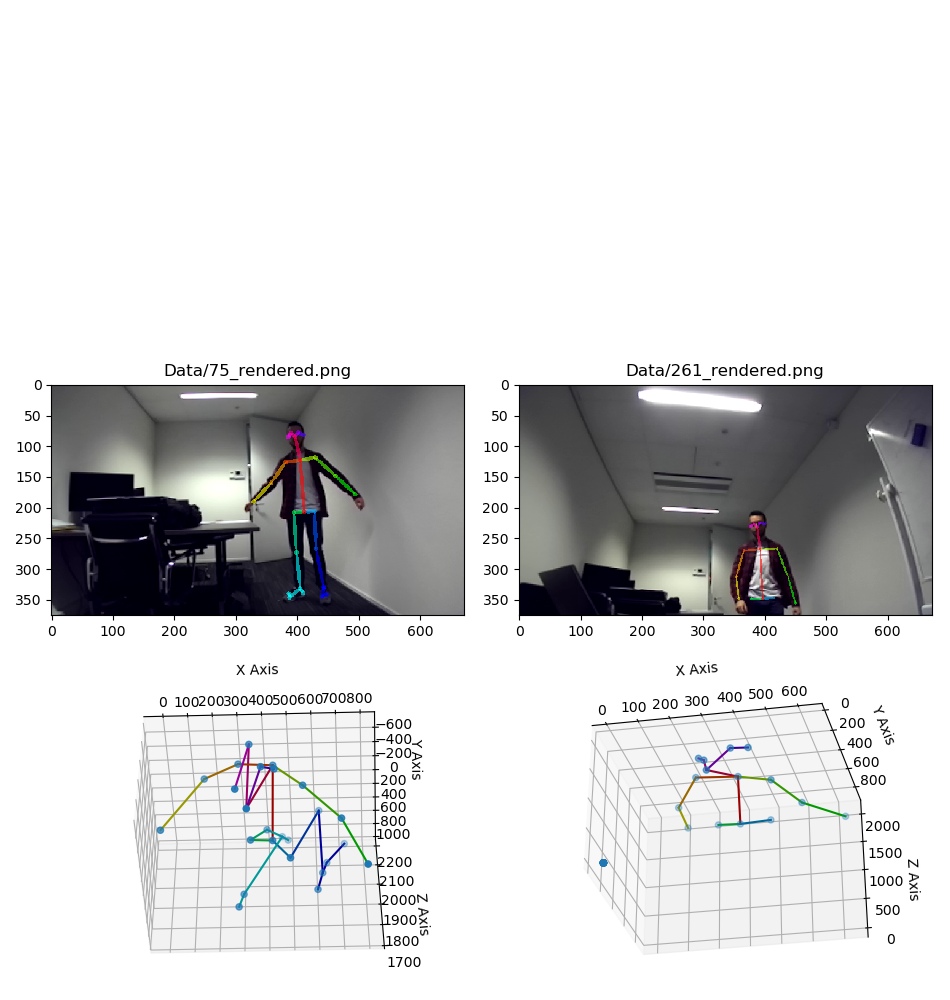

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()


In [73]:
import random

imgnames = random.sample(imgfilenames, 2)
kpnames = [name.replace('rendered.png', 'keypoints.json') for name in imgnames]

plot_skeleton(imgnames + kpnames, figsize=(9.5, 10))